<a href="https://colab.research.google.com/github/baharababah/Linear_Regression_StepByStep/blob/main/Linear_Regression_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# --------------------------------------------------------------
# Simple Linear Regression for house prices 
# The dataset was obtained from https://github.com/Shreyas3108/house-price-prediction
# --------------------------------------------------------------
from google.colab import drive 
drive.mount('/content/drive/')
# ----------------------------------------------
# Step 0 - Import Libraries
# ---------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets
# ----------------------------------------------
# Step 1 - Read the data
# ----------------------------------------------
houses = pd.read_csv('/content/drive/My Drive/kc_house_data.csv')
houses.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [64]:
# Show the columns names and the datatype they have.
houses.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [65]:
# ----------------------------------------------
# Step 2 - Prelim Analysis and Feature selection
# ----------------------------------------------
# In order to save the orignal copy of the datafarme, we copy it to a new dataframe called houses_prep to start process and analyse the data.
houses_prep = houses.copy()
# we drop the columns of date and id because it will not affect the prediction.
# we drop the column of zipcode even we can use the first digits as an area indicators.
houses_prep = houses_prep.drop(['date', 'id', 'zipcode'], axis=1)
# we check if there is any missing value.
houses_prep.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2a7ccbcc0>]],
      dtype=object)

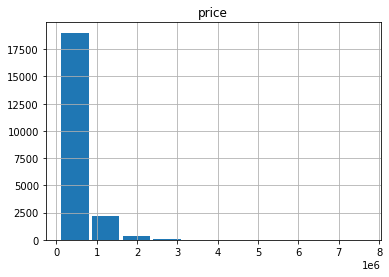

In [66]:
# Create pandas histogram to check if the price is normal distribution
houses_prep.hist(column= 'price', rwidth = 0.9)

The histogram shows that price variable is not Normally Distributed

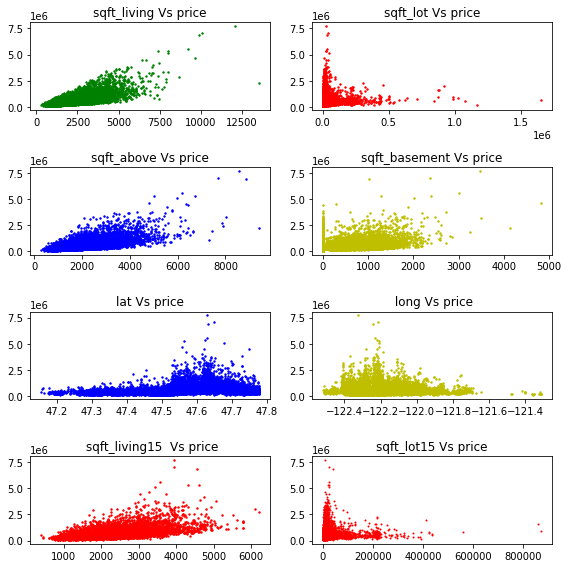

In [67]:
# ----------------------------------------------
# Step 3 - Data Visualisation
# ----------------------------------------------
#price            float64
# Visualise the continuous features Vs price
# The continuous features are sqft_living , sqft_lot, sqft_above , sqft_basement , lat , long  , sqft_living15 , sqft_lot15.
fig = plt.figure(figsize=(8, 8))
plt.subplot(4,2,1) 
plt.title('sqft_living Vs price')
plt.scatter(houses_prep['sqft_living'], houses_prep['price'], s=2, c='g')
plt.tight_layout()

plt.subplot(4,2,2) 
plt.title('sqft_lot Vs price')
plt.scatter(houses_prep['sqft_lot'], houses_prep['price'], s=2, c='r')
plt.tight_layout()


plt.subplot(4,2,3) 
plt.title('sqft_above Vs price')
plt.scatter(houses_prep['sqft_above'], houses_prep['price'], s=2, c='b')
plt.tight_layout()

plt.subplot(4,2,4) 
plt.title('sqft_basement Vs price')
plt.scatter(houses_prep['sqft_basement'], houses_prep['price'], s=2, c='y')
plt.tight_layout()

plt.subplot(4,2,5) 
plt.title('lat Vs price')
plt.scatter(houses_prep['lat'], houses_prep['price'], s=2, c='b')
plt.tight_layout()

plt.subplot(4,2,6) 
plt.title(' long Vs price')
plt.scatter(houses_prep['long'], houses_prep['price'], s=2, c='y')
plt.tight_layout()

plt.subplot(4,2,7) 
plt.title(' sqft_living15  Vs price')
plt.scatter(houses_prep['sqft_living15'], houses_prep['price'], s=2, c='r')
plt.tight_layout()


plt.subplot(4,2,8) 
plt.title('sqft_lot15 Vs price')
plt.scatter(houses_prep['sqft_lot15'], houses_prep['price'], s=1, c='r')
plt.tight_layout()


**The scatter plots show that:**
1.   The price increase while sqft_living increase
2.   The price increase while sqft_above increase.
3.   The price increase while sqft_living15 increase.
4.   The graphes of sqft_living, sqft_above, sqft_living15 are very similar.

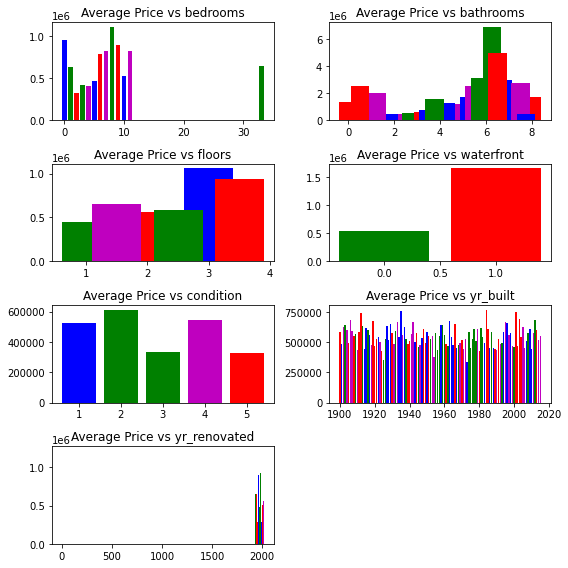

In [68]:
# Visualise the categorical features
colors = ['g', 'r', 'm', 'b']
fig = plt.figure(figsize=(8, 8))
plt.subplot(4,2,1)
plt.title('Average Price vs bedrooms')
cat_list = houses_prep['bedrooms'].unique()
cat_average = houses_prep.groupby('bedrooms').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

plt.subplot(4,2,2)
plt.title('Average Price vs bathrooms')
cat_list = houses_prep['bathrooms'].unique()
cat_average = houses_prep.groupby('bathrooms').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

plt.subplot(4,2,3)
plt.title('Average Price vs floors')
cat_list = houses_prep['floors'].unique()
cat_average = houses_prep.groupby('floors').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

plt.subplot(4,2,4)
plt.title('Average Price vs waterfront')
cat_list = houses_prep['waterfront'].unique()
cat_average = houses_prep.groupby('waterfront').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()


plt.subplot(4,2,5)
plt.title('Average Price vs condition')
cat_list = houses_prep['condition'].unique()
cat_average = houses_prep.groupby('condition').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

plt.subplot(4,2,6)
plt.title('Average Price vs yr_built')
cat_list = houses_prep['yr_built'].unique()
cat_average = houses_prep.groupby('yr_built').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()

plt.subplot(4,2,7)
plt.title('Average Price vs yr_renovated')
cat_list = houses_prep['yr_renovated'].unique()
cat_average = houses_prep.groupby('yr_renovated').mean()['price']
plt.bar(cat_list, cat_average, color=colors)
plt.tight_layout()



The graph

In [69]:
# Check for outliers
houses_prep['price'].describe().apply("{0:.5f}".format)

count      21613.00000
mean      540088.14177
std       367127.19648
min        75000.00000
25%       321950.00000
50%       450000.00000
75%       645000.00000
max      7700000.00000
Name: price, dtype: object

50% of the prices are between 321950 and 645000.
The differences between the mean and the max is too large.

In [70]:
houses_prep['price'].quantile([0.05, 0.1, 0.15, 0.5, 0.9, 0.95, 0.99])

0.05     210000.0
0.10     245000.0
0.15     270000.0
0.50     450000.0
0.90     887000.0
0.95    1156480.0
0.99    1964400.0
Name: price, dtype: float64

It is now clear thatr there are Outliers in the data.

In [71]:
# ------------------------------------------------------
# Step 4 - Check Multiple Linear Regression Assumptions
# ------------------------------------------------------
# Linearity using correlation coefficient matrix using corr
pd.options.display.max_columns = None
correlation = houses_prep[['sqft_living', 'sqft_above', 'lat', 'sqft_basement', 'long', 'sqft_living15', 'price']].corr()
print(correlation)

               sqft_living  sqft_above       lat  sqft_basement      long  \
sqft_living       1.000000    0.876597  0.052529       0.435043  0.240223   
sqft_above        0.876597    1.000000 -0.000816      -0.051943  0.343803   
lat               0.052529   -0.000816  1.000000       0.110538 -0.135512   
sqft_basement     0.435043   -0.051943  0.110538       1.000000 -0.144765   
long              0.240223    0.343803 -0.135512      -0.144765  1.000000   
sqft_living15     0.756420    0.731870  0.048858       0.200355  0.334605   
price             0.702035    0.605567  0.307003       0.323816  0.021626   

               sqft_living15     price  
sqft_living         0.756420  0.702035  
sqft_above          0.731870  0.605567  
lat                 0.048858  0.307003  
sqft_basement       0.200355  0.323816  
long                0.334605  0.021626  
sqft_living15       1.000000  0.585379  
price               0.585379  1.000000  


we are going to drop (long ) becuase it does not have correlation with the price.

we are also going to drop the sqft_above because its correlation with sqft_living is high so one variable is enough.

In [72]:
# Step 5 - Drop irrelevant features
houses_prep = houses_prep.drop(['sqft_above', 'long'], axis=1)


In [73]:
houses_prep.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,1800,7503


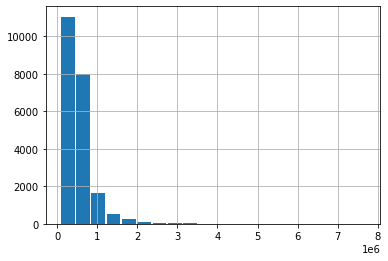

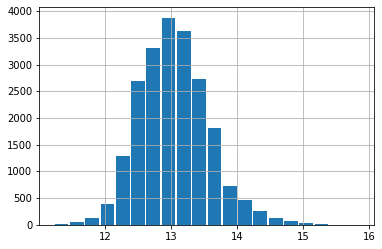

In [74]:
# ------------------------------------------------------
# Step 6 - Create/Modify new features
# ------------------------------------------------------

#The price is currently log normal distribution, we want to change it to normal distribution in the next step.

df1= houses_prep['price']
df2= np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)
houses_prep['price']= np.log(houses_prep['price'])

In [75]:
# -----------------------------------------------------------------------------
# Step 7 - Create Dummy Variables and drop first to avoid dummy variables trap
# -----------------------------------------------------------------------------
# - bedrooms         0
# - bathrooms 
# - floors
# - waterfront
# - view
# - condition
# - grade
# - yr_built
# - yr_renovated
# Using get_dummies

houses_prep['bedrooms'] = houses_prep['bedrooms'].astype('category')
houses_prep['bathrooms'] = houses_prep['bathrooms'].astype('category')
houses_prep['floors'] = houses_prep['floors'].astype('category')
houses_prep['waterfront'] = houses_prep['waterfront'].astype('category')
houses_prep['view'] = houses_prep['view'].astype('category')
houses_prep['condition'] = houses_prep['condition'].astype('category')
houses_prep['grade'] = houses_prep['grade'].astype('category')
houses_prep['yr_built'] = houses_prep['yr_built'].astype('category')
houses_prep['yr_renovated'] = houses_prep['yr_renovated'].astype('category')
houses_prep = pd.get_dummies(houses_prep, drop_first=True)
print(houses_prep.head())

       price  sqft_living  sqft_lot  sqft_basement      lat  sqft_living15  \
0  12.309982         1180      5650              0  47.5112           1340   
1  13.195614         2570      7242            400  47.7210           1690   
2  12.100712          770     10000              0  47.7379           2720   
3  13.311329         1960      5000            910  47.5208           1360   
4  13.142166         1680      8080              0  47.6168           1800   

   sqft_lot15  bedrooms_1  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  \
0        5650           0           0           1           0           0   
1        7639           0           0           1           0           0   
2        8062           0           1           0           0           0   
3        5000           0           0           0           1           0   
4        7503           0           0           1           0           0   

   bedrooms_6  bedrooms_7  bedrooms_8  bedrooms_9  bedrooms_10  bedr

In [76]:

# ----------------------------------------------------------
# Step 8 - Create Train and test split
# ----------------------------------------------------------

# Split the X and Y dataset into training and testing set
#
#      from sklearn.model_selection import train_test_split
#      X_train, X_test, Y_train, Y_test = \
#      train_test_split(X, Y, test_size = 0.4, random_state = 1234)
#
# Demand is time-series type of data

Y = houses_prep[['price']]
X = houses_prep.drop(['price'], axis= 1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]


In [77]:

# ----------------------------------------------------------
# Step 9 - Fit and Score the model
# ----------------------------------------------------------
# Linear Regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)


# Create Y Predictions
Y_predict = std_reg.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

print('r2_test ', r2_test)
print('r2_train', r2_train)
print('rmse', rmse)


r2_test  0.774743913356278
r2_train 0.7847894216937253
rmse 0.24917234636396374


In [78]:

# Calculate RMSLE and compare results
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.24917177958238695
